Factor Loadings:
[[ 0.91464091 -0.35107679 -0.16137101]
 [ 0.00428044 -0.0062084   0.00949538]
 [ 0.11563435 -0.05676238 -0.12323827]
 [ 0.62679721  0.70745962  0.10417905]
 [ 0.2347379   0.30392584  0.03142447]
 [ 0.44608477  0.59412205 -0.00367409]
 [-0.6255409   0.1866795   0.59362072]
 [ 0.17913176 -0.15637368  0.7429569 ]
 [ 0.84856706 -0.36177391  0.38295885]
 [-0.04207393  0.00782899 -0.096268  ]]


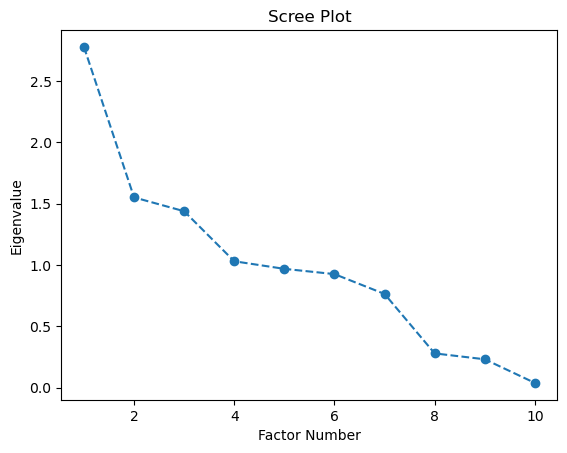

Rotated Factor Loadings:
[[ 9.11589043e-01  1.76417430e-01  3.51775241e-01]
 [ 8.36563301e-04 -2.18511347e-03  1.18976454e-02]
 [ 1.73979133e-01  3.44224266e-03 -3.87343914e-02]
 [ 1.16486576e-01  9.38046106e-01  1.03573705e-01]
 [ 3.12808599e-02  3.83554258e-01  1.91816581e-02]
 [ 8.55362146e-02  7.37658826e-01 -2.30031658e-02]
 [-8.52787770e-01 -1.26134024e-01  1.88094263e-01]
 [-1.88214219e-01  2.41001664e-02  7.56650822e-01]
 [ 5.83404021e-01  1.76891055e-01  7.91172042e-01]
 [ 1.55460501e-02 -2.36256774e-02 -1.01484898e-01]]


In [2]:
# Import necessary libraries
from factor_analyzer import FactorAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('./all_data.csv') 

# Exclude the label column (assuming it's the first column)
df = df.iloc[:, 1:]

# Handle missing values (if any)
df.dropna(inplace=True)

# Standardize the data (recommended for factor analysis)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Create a factor analysis model with the desired number of factors
n_factors = 3  # Replace with the desired number of factors
factor_analyzer = FactorAnalyzer(n_factors, rotation=None)  # Rotation can be 'varimax' or 'promax' for oblique rotation

# Fit the factor analysis model to the data
factor_analyzer.fit(df_scaled)

# Get factor loadings
factor_loadings = factor_analyzer.loadings_

# Print factor loadings
print("Factor Loadings:")
print(factor_loadings)

# Get eigenvalues and create a scree plot
eigenvalues, _ = factor_analyzer.get_eigenvalues()
x = np.arange(1, len(eigenvalues) + 1)
plt.plot(x, eigenvalues, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Factor Number")
plt.ylabel("Eigenvalue")
plt.show()

# Optional: Perform factor rotation (e.g., varimax or promax) for better interpretability
factor_analyzer = FactorAnalyzer(n_factors, rotation='varimax')
factor_analyzer.fit(df_scaled)

# Visualize factor loadings after rotation (if performed)
rotated_loadings = factor_analyzer.loadings_
print("Rotated Factor Loadings:")
print(rotated_loadings)